In [134]:
import numpy as np 

import matplotlib.pyplot as plt

In [135]:
angle = 14.708 #degrees 
correction_height = 19.48 #mm, difference between the laser source and the top of the imaginary triangle

lidar_height = 952

frequencies = [50,100,200,500,1000,2000]    

def find_f(input_height):
    global lidar_height
    lidar_height = input_height
    lidar_height += correction_height 
    point_width = (lidar_height * np.tan(np.radians(angle))) / 1600

    print("table speed and frequency combinations for a height of {lidar_height} mm:")
    for f in frequencies:
        ts = point_width * f
        print(f" {f} Hz: {ts} mm/s")

    print(f"'pixel size' = {point_width} mm by {point_width} mm ")


def find_h(table_speed = 50, frequency = 200):
    global lidar_height
    point_width = table_speed/frequency
    table_height = point_width/ np.tan(np.radians(angle)) * 1600
    lidar_height = table_height - correction_height

    print(f"ideal height for {table_speed} mm/s and {frequency} Hz = {lidar_height} mm")
    print(f"'pixel size' = {point_width} mm by {point_width} mm ")

def find_hf(pixel_size_x = 0.25, pixel_size_y = 0.229):
    global lidar_height
    table_height = pixel_size_y/ np.tan(np.radians(angle)) * 1600
    lidar_height = table_height - correction_height

    print(f"ideal height offset for {pixel_size_y} mm pixel height = {lidar_height} mm")

    print(f"table speed and frequency combinations for a pixel width of {pixel_size_x} mm:")
    for f in frequencies:
        ts = pixel_size_x * f
        print(f" {f} Hz: {ts} mm/s")


def visualize_height():
    global lidar_height
    max_distance = 1352 + correction_height
    max_width = max_distance* np.tan(np.radians(angle))
    min_width = correction_height* np.tan(np.radians(angle))
    lidar_height -= correction_height
    
    top_left = (-min_width, -correction_height)
    top_right = (min_width, -correction_height)
    bottom_left = (-max_width, -max_distance)
    bottom_right = (max_width, -max_distance)

    fig, ax = plt.subplots(figsize=(6,4))
    
    ax.plot([top_left[0], top_right[0]], [top_left[1], top_right[1]], 'gray', linestyle='-')
    ax.plot([top_left[0], bottom_left[0]], [top_left[1], bottom_left[1]], 'gray', linestyle='-')
    ax.plot([top_right[0], bottom_right[0]], [top_right[1], bottom_right[1]], 'gray', linestyle='-')


    width = lidar_height * np.tan(np.radians(angle))

    ax.hlines(-lidar_height, -width, width, colors='red', linestyles='--', label='ideal height')

    print(lidar_height)

    for h in [1352, 952, 552]:
        y = -h - correction_height
        base = -y * np.tan(np.radians(angle))
        ax.hlines(y, -base, base, colors='grey', linestyles='--', label=f'{h} mm')

    ax.set_xlabel('Width (mm)')
    ax.set_ylabel('Height (mm)')
    ax.set_title('Ideal Height Plot')
    ax.legend(loc='upper right')
    ax.grid(True)
    plt.show()

   



table speed and frequency combinations for a height of {lidar_height} mm:
 50 Hz: 4.6878206243817395 mm/s
 100 Hz: 9.375641248763479 mm/s
 200 Hz: 18.751282497526958 mm/s
 500 Hz: 46.878206243817395 mm/s
 1000 Hz: 93.75641248763479 mm/s
 2000 Hz: 187.51282497526958 mm/s
'pixel size' = 0.09375641248763479 mm by 0.09375641248763479 mm 
552.0


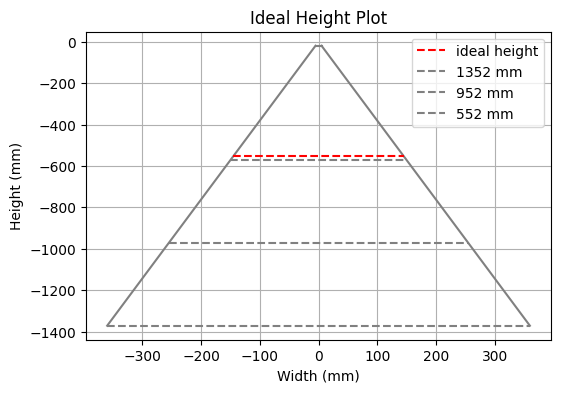


ideal height for 75 mm/s and 500 Hz = 894.8254616270175 mm
'pixel size' = 0.15 mm by 0.15 mm 
875.3454616270175


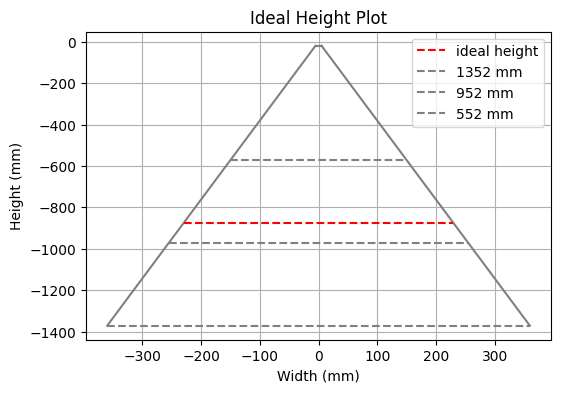


ideal height offset for 0.22 mm pixel height = 1321.501343719626 mm
table speed and frequency combinations for a pixel width of 0.25 mm:
 50 Hz: 12.5 mm/s
 100 Hz: 25.0 mm/s
 200 Hz: 50.0 mm/s
 500 Hz: 125.0 mm/s
 1000 Hz: 250.0 mm/s
 2000 Hz: 500.0 mm/s
1302.021343719626


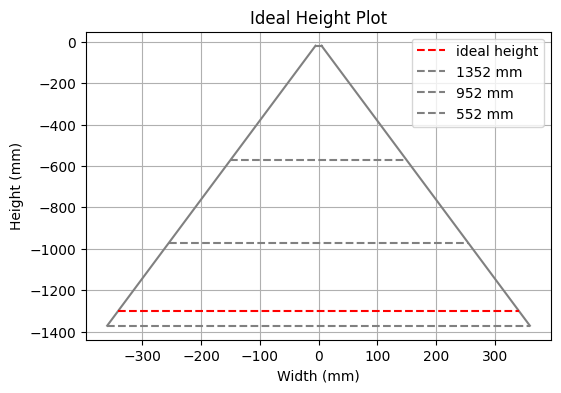

In [136]:
find_f(input_height = 552)
visualize_height()
print()
find_h(table_speed = 75, frequency = 500)
visualize_height()
print()
find_hf(pixel_size_x = 0.25, pixel_size_y = 0.22)
visualize_height()

In [137]:
n = 25

for i in range(1,(int)((n+1)/2)):
    sum = 0
    for j in range(i,n-i):
        sum += 1/j
    print(sum)

3.73429151108684
2.6908132502172752
2.145358704762729
1.7644063238103485
1.4644063238103484
1.2117747448629803
0.989552522640758
0.7878718503718505
0.6003718503718504
0.42259407259407256
0.2511655011655012
0.08333333333333333
